<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/YB_0926(2)_exercises_AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [21]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [22]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [23]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

### Step 4.  Check out the type of the columns

In [24]:
apple.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


### Step 5. Transform the Date column as a datetime type

In [25]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [26]:
apple = apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [27]:
apple.index.is_unique

True

중복된 날짜가 없는 것

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [28]:
apple.sort_index(ascending=True, inplace=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [30]:
apple['Year'] = apple.index.year
apple['Month'] = apple.index.month

last_day_index = apple.groupby(['Year', 'Month']).apply(lambda x: x.index.max())
last_day_index

/tmp/ipython-input-3197479603.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_day_index = apple.groupby(['Year', 'Month']).apply(lambda x: x.index.max())


Year  Month
1980  12      1980-12-31
1981  1       1981-01-30
      2       1981-02-27
      3       1981-03-31
      4       1981-04-30
                 ...    
2014  3       2014-03-31
      4       2014-04-30
      5       2014-05-30
      6       2014-06-30
      7       2014-07-08
Length: 404, dtype: datetime64[ns]

### Step 10.  What is the difference in days between the first day and the oldest

In [29]:
diff = apple.index.max() - apple.index.min()
diff

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [32]:
n_months = apple.index.to_period('M').nunique()
n_months

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<Figure size 1000x600 with 0 Axes>

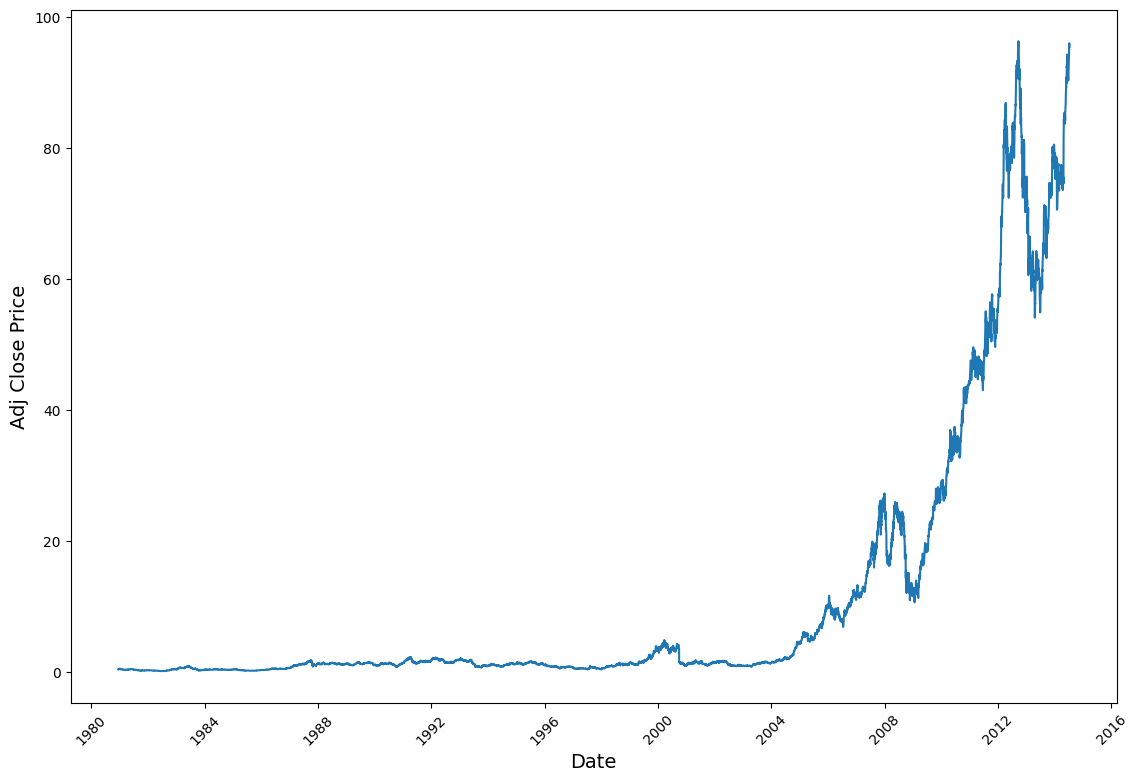

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))


plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'])

plt.xlabel('Date', fontsize=14)
plt.ylabel('Adj Close Price', fontsize=14)

plt.xticks(rotation=45)

plt.show()